In [1]:
# Carrega Bibliotecas

library("scales")
library(dplyr)
library(ggplot2)
library(daltoolbox)
library(RColorBrewer)
library(GGally)
library(reshape)
library(corrplot)
library(WVPlots)
library(aplpack)
library(gridExtra)
library(tidyr)
library(factoextra)
library("dbscan")
library("fpc")
#color palette
colors <- brewer.pal(4, 'Set1')

# setting the font size for all charts
font <- theme(text = element_text(size=16))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


corrplot 0.92 loaded

Loading required package: wrapr


Attaching package: ‘wrapr’


The following object is masked from ‘package:dplyr’:

    coalesce


Warning message:
“no DISPLAY variable so Tk is not available”

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘tidyr’


The following objects are masked from ‘package:wrapr’:

    pack, un

In [2]:
# Carrega Dataset
load("/home/data/malaria/malaria.RData")

# Lista Objetos
ls()

[1] "colors" "data"   "font"

In [3]:
# Exibe as Colunas
head(data)


,infection.county,home.county,notification.county,qty.parasites,scheme,notification.hr,home.hr,infection.hr,exam.type,exam.result,⋯,exam.month,exam.year,treatment.month,treatment.year,symptom.month,symptom.year,exam.interval,treatment.interval,notification.interval,previous.treatment
,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<fct>
1,110001,110001,110001,501100,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,02,2014,02,2014,02,2014,on the same day,on the same day,on the same day,vivax
2,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,12,2014,12,2014,12,2014,on the same day,on the same day,1 to 7 days,vivax
3,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2014,11,2014,11,2014,on the same day,on the same day,on the same day,no
4,110001,110001,110001,NA,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2013,10,2013,10,2013,on the same day,on the same day,1 to 7 days,no
5,110001,110001,110001,3,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,10,2014,10,2014,10,2014,on the same day,on the same day,1 to 7 days,no
6,110001,110001,110001,305500,1,ZONA DA MATA,ZONA DA MATA,ZONA DA MATA,thick and thin blood smears,vivax,⋯,11,2013,11,2013,NA,NA,1 to 7 days,on the same day,NA,no


In [4]:
#Separa tabelas para usarmos no testarmos os algoritmos
split <- data %>% select (gender,age,exam.result)

#Aplicado filtro aos valores mais usados para o gráfico pois os demais campos eram muito irrelevantes para aparecer no gráfico
#também retira os resultados negativos

split <- split %>% filter (exam.result=="vivax" | exam.result=="falciparum")



In [5]:
summary(split)

     gender                        age             exam.result     
 male   :1604514   05 to 14 years old:621329   vivax     :2365980  
 female :1023725   15 to 24 years old:561862   falciparum: 262440  
 ignored:    175   25 to 34 years old:458624   negative  :      0  
 NA's   :      6   35 to 44 years old:320548   F+FG      :      0  
                   01 to 04 years old:268809   F+V       :      0  
                   (Other)           :397214   V+FG      :      0  
                   NA's              :    34   (Other)   :      0  

In [6]:
# Observamos que o algoritmos só aceita dados numéricos
# Transformando dados categóricos em dados numéricos

split$age <- unclass(split$age)
split$gender <- unclass(split$gender)
#tirando NA
split <- na.omit(split)


In [7]:
#agora só dados não numéricos
head(split)

,gender,age,exam.result
,<int>,<int>,<fct>
1,1,3,vivax
2,1,4,vivax
3,1,4,vivax
4,1,4,vivax
5,2,5,vivax
6,1,4,vivax


In [8]:
#reduzir a amostragem para 1000 registros

#split <- sample_n(split, 1000)

In [9]:
# Aplicando o ALgoritmo Clustering do DBScan do DaltoolBox

# setup clustering
model <- cluster_dbscan(minPts = 10)
# build model
model <- fit(model, split[,1:2])
clu <- cluster(model, split[,1:2])
table(clu)




clu
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
 12 132  99 116  78  52  95 131  47  55  23  54  45  19  12  20  10 

In [10]:
# evaluate model using external metric
eval <- evaluate(model, clu, split$exam.result)
eval

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
0,0.8112781,12,0.009735337
1,0.4879180,132,0.064405175
2,0.5610285,99,0.055541820
3,0.4523816,116,0.052476268
4,0.6193822,78,0.048311811
5,0.4566836,52,0.023747549
6,0.3398551,95,0.032286232
7,0.5774011,131,0.075639540
8,0.4199211,47,0.019736292


In [11]:
# Aplicando o ALgoritmo Clustering do k-means

modelk <- cluster_kmeans(k=3)

# build model
modelk <- fit(model, split[,1:2])
cluk <- cluster(model, split[,1:2])
table(cluk)
cluk

# evaluate model using external metric
evalk <- evaluate(modelk, cluk, split$exam.result)
evalk

cluk
  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16 
 12 132  99 116  78  52  95 131  47  55  23  54  45  19  12  20  10 

[1]  1  2  3  3  4  5  3  6  7  2  1  2  7  8  2  2  5  6  5  1  9  6  1 10
  [25]  2  7  8  1  7 11 12  8  4  2  3  3  0  6  5  1  2  6  7  7  2  2  6  9
  [49]  2  4 13  2  6 11 11  7  7  1 12  6  7  2 11  1  3  9  1  1  3  5  8 10
  [73]  2  2 14  3  1  9  1  8 15  1  4  7 16  5  1  2 12  7  3  4  7  1  7  7
  [97]  7 14  2  3  4  6  2  4  7  1  7  3  6  3  1  3 13  9 13  4  5  2  3  1
 [121]  9  7  6  7  2  1  6  4  6  3  8  2  2  2  6 11 13  5  9  9  8  5  3 15
 [145]  7  2  7  4  6 16  3  6  3 11  6 13  4 10 11  7  6  2  2  6  3  6  1  3
 [169]  7  7 15 10  1  1  6  9  7  9 13  4 12  7 11  4  1  6  2  1  2  3  2  4
 [193] 12  7  8  5  6 12  3  6  6  7  6  3  7  2  2 11  8  8  1 11  7  7  1 12
 [217]  3 10  1 11 10  7  3  2  7 11 16  1  4  7  2  8 12  5  8  5  5  4  0 11
 [241] 10 10 15  6  2  2  6  4  1  7 10  5  3  1  7  3  1  4  7 12  7 11  7 11
 [265]  1  1  1  1  4  3  7  6  7 11  1  3  9  7  1 16  8  6  6  9  6  3  4  8
 [289]  2  6  3  7  8  1  3  8  2 15 11 11  7  1  7  1  1  1 13 12  3  8  6 12
 [313]  4  1  9  1  9  3  3  8  2  3  7 11 16  7  6  8  8  7 15  7  2  8  6  3
 [337]  1 11  0 12  7  7 11  3  5 13  6  4 11  2  7  1  4  7 15  1  2  2  8  4
 [361]  4  7  3  1  4  2 16 12  3  3  8  3 11  3  6 14  3  6  8  1  9  0  2 12
 [385]  9  7  7  4  9  4  9  1  5  1 13  6  4  7 10 12  1  7  1  2  2 12  1  3
 [409]  1  3  6  9  6 11 12  3  4  7  5  9  2  1 15  7  8  6 14  9  3  3  6  2
 [433]  1  9 12  6 12  1  6  2  5 12  1  1  2  3  4 11  2  3  1  6  1  7  7  3
 [457]  2  2  9  1 13 11 10  1 12  1 16  2  9 12  8 11 13  7  7  3  9  3  7 12
 [481]  3 12  9  8  8  4  5  4 16 11  3 12  5  1  1  7  3  7  1  7  4  4 13  8
 [505]  3  1  0  9 10  2  1 15 11  0  1  3 11 15  4  7  1  2  4  1  4  6  7  3
 [529]  3  7 11  3  0  5  3 11 12  5  1  3 15  3  1 14  8  1 10  5  2  7 11  6
 [553]  5  1  7  4  6  7 12  1  7  1 16  1  7 11  1 10  4  6  1 14  7 12  4  5
 [577]  5  8  3 14  3  4  1  9  0  4  4  7  4  3  3  7 11  6  7  7  6  1 11  4
 [601]  6 11  5 12 10  5  3 11  2  9  1 10 14  3  3  3  2  9  6 12  1  7  6  6
 [625]  6  7 11  0  3  3  1  7  4  3 13 13  2  7  9  7  3  4  1 16  2  8  5  1
 [649] 11 15  7  2  7 12  9  2  6  2  7  8  1  5  6  7  5  3  5  5 12 11  7  2
 [673]  1  2  8  3 11  9  1  1 10  6  6  8  7  3  1  5  9  6  7  1  9  7  3 13
 [697]  3  3  3 12  4  8  9  2  1 15  4  7 12  7  5  2  2  9  7  4  4  7  7  3
 [721]  9 10  2  1  7  4 10  2  9  1 11  4  3  2  2  7  6  7  2  6  3 15  7  5
 [745]  8  1  1  9  2  7  9  2  6  6  2  2  1  2  7 15  4  7  1  2  1  1  2  4
 [769]  1  1  4  4  6  2  4 11 13  1  1  7  9  9 11  6  7  8 12  6  3  5  4  7
 [793]  6  7  4 12  9  3  3 10 14 10 10  7  1  4 11  4  7  3  1  3  5 14  6  2
 [817]  6  6  3  4  3  9  9  1 13 13 14  3  7  2  1  3  4  6  5  9  4  0 15  5
 [841]  5  6 11  1  7  1  7 12  1  3  3  2  3  3  5  2  1  7 13  3  7 12  7 10
 [865]  6  6  8  4  1  4  1  1  6  1  9  6  4  9  2  1  9  7  7  3  7  6  5  6
 [889]  6 11  4  7 12  5  6  8 15  4  0  6  6  2  1  1  8  2  4  3  8  2  5  1
 [913] 12  3  7  9 15  8  3  6  9  9  8  2  7  5  9  3 11  3  6  2  7  7  6  3
 [937]  3 12  4  2  1  4  6  5  4  9 11  2  6  7 12 11  7  7 12  3 11  6 14  1
 [961]  1  5  4  1  2  3 12 11  5  8  3 15  6  4  3  3 12  5 11  3  7  7 15  5
 [985]  1  1  0  2  4  1  2  2  1  8  5  6  3  2  8  6
attr(,"metric")
[1] 12

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
0,0.8112781,12,0.009735337
1,0.4879180,132,0.064405175
2,0.5610285,99,0.055541820
3,0.4523816,116,0.052476268
4,0.6193822,78,0.048311811
5,0.4566836,52,0.023747549
6,0.3398551,95,0.032286232
7,0.5774011,131,0.075639540
8,0.4199211,47,0.019736292


In [12]:
# Aplicando o ALgoritmo de tunning de hyperparametro no k-means

# fit model
modelt <- clu_tune(cluster_kmeans(k = 0))
ranges <- list(k = 1:10)
modelt <- fit(modelt, split[,1:2], ranges)
print ("Parâmetro escolhido: ", modelt$k)

# run model
clut <- cluster(modelt, split[,1:2])
table(clut)
# evaluate model using external metric
evalt <- evaluate(modelt, clut, split$exam.result)
evalt

[1] "Parâmetro escolhido: "


clut
  1   2   3   4   5   6 
 99  99  76  50 351 325 

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
1,0.5328351,99,0.05275067
2,0.5610285,99,0.05554182
3,0.4854608,76,0.03689502
4,0.5842388,50,0.02921194
5,0.4497381,351,0.15785807
6,0.5467949,325,0.17770836


In [13]:
# Aplicando o ALgoritmo Clustering de PAM

# setup clustering
modelp <- cluster_pam(k=3)
# build model
modelp <- fit(modelp, split[,1:2])
clup <- cluster(modelp, split[,1:2])
table(clup)
clup

# evaluate model using external metric
evalp <- evaluate(modelp, clup, split$exam.result)
evalp


clup
  1   2   3 
351 270 379 

[1] 1 2 3 3 3 1 3 1 3 2 1 2 3 2 2 2 1 1 1 1 1 1 1 2 2 3 2 1 3 3 2 2 3 2 3 3 2
  [38] 1 1 1 2 1 3 3 2 2 1 1 2 3 2 2 1 3 3 3 3 1 2 1 3 2 3 1 3 1 1 1 3 1 2 2 2 2
  [75] 1 3 1 1 1 2 2 1 3 3 2 1 1 2 2 3 3 3 3 1 3 3 3 1 2 3 3 1 2 3 3 1 3 3 1 3 1
 [112] 3 2 1 2 3 1 2 3 1 1 3 1 3 2 1 1 3 1 3 2 2 2 2 1 3 2 1 1 1 2 1 3 2 3 2 3 3
 [149] 1 2 3 1 3 3 1 2 3 2 3 3 1 2 2 1 3 1 1 3 3 3 2 2 1 1 1 1 3 1 2 3 2 3 3 3 1
 [186] 1 2 1 2 3 2 3 2 3 2 1 1 2 3 1 1 3 1 3 3 2 2 3 2 2 1 3 3 3 1 2 3 2 1 3 2 3
 [223] 3 2 3 3 2 1 3 3 2 2 2 1 2 1 1 3 1 3 2 2 2 1 2 2 1 3 1 3 2 1 3 1 3 3 1 3 3
 [260] 2 3 3 3 3 1 1 1 1 3 3 3 1 3 3 1 3 1 3 1 2 2 1 1 1 1 3 3 2 2 1 3 3 2 1 3 2
 [297] 2 2 3 3 3 1 3 1 1 1 2 2 3 2 1 2 3 1 1 1 1 3 3 2 2 3 3 3 2 3 1 2 2 3 2 3 2
 [334] 2 1 3 1 3 1 2 3 3 3 3 1 2 1 3 3 2 3 1 3 3 2 1 2 2 2 3 3 3 3 1 3 2 2 2 3 3
 [371] 2 3 3 3 1 1 3 1 2 1 1 2 2 2 1 3 3 3 1 3 1 1 1 1 2 1 3 3 2 2 1 3 1 2 2 2 1
 [408] 3 1 3 1 1 1 3 2 3 3 3 1 1 2 1 2 3 2 1 1 1 3 3 1 2 1 1 2 1 2 1 1 2 1 2 1 1
 [445] 2 3 3 3 2 3 1 1 1 3 3 3 2 2 1 1 2 3 2 1 2 1 2 2 1 2 2 3 2 3 3 3 1 3 3 2 3
 [482] 2 1 2 2 3 1 3 2 3 3 2 1 1 1 3 3 3 1 3 3 3 2 2 3 1 2 1 2 2 1 2 3 2 1 3 3 2
 [519] 3 3 1 2 3 1 3 1 3 3 3 3 3 3 2 1 3 3 2 1 1 3 2 3 1 1 2 1 2 1 2 3 3 1 1 1 3
 [556] 3 1 3 2 1 3 1 2 1 3 3 1 2 3 1 1 1 3 2 3 1 1 2 3 1 3 3 1 1 2 3 3 3 3 3 3 3
 [593] 3 1 3 3 1 1 3 3 1 3 1 2 2 1 3 3 2 1 1 2 1 3 3 3 2 1 1 2 1 3 1 1 1 3 3 1 3
 [630] 3 1 3 3 3 2 2 2 3 1 3 3 3 1 2 2 2 1 1 3 2 3 2 3 2 1 2 1 2 3 2 1 1 1 3 1 3
 [667] 1 1 2 3 3 2 1 2 2 3 3 1 1 1 2 1 1 2 3 3 1 1 1 1 3 1 1 3 3 2 3 3 3 2 3 2 1
 [704] 2 1 2 3 3 2 3 1 2 2 1 3 3 3 3 3 3 1 2 2 1 3 3 2 2 1 1 3 3 3 2 2 3 1 3 2 1
 [741] 3 2 3 1 2 1 1 1 2 3 1 2 1 1 2 2 1 2 3 2 3 3 1 2 1 1 2 3 1 1 3 3 1 2 3 3 2
 [778] 1 1 3 1 1 3 1 3 2 2 1 3 1 3 3 1 3 3 2 1 3 3 2 1 2 2 3 1 3 3 3 3 3 1 3 1 1
 [815] 1 2 1 1 3 3 3 1 1 1 2 2 1 3 3 2 1 3 3 1 1 1 3 2 2 1 1 1 3 1 3 1 3 2 1 3 3
 [852] 2 3 3 1 2 1 3 2 3 3 2 3 2 1 1 2 3 1 3 1 1 1 1 1 1 3 1 2 1 1 3 3 3 3 1 1 1
 [889] 1 3 3 3 2 1 1 2 2 3 1 1 1 2 1 1 2 2 3 3 2 2 1 1 2 3 3 1 2 2 3 1 1 1 2 2 3
 [926] 1 1 3 3 3 1 2 3 3 1 3 3 2 3 2 1 3 1 1 3 1 3 2 1 3 2 3 3 3 2 3 3 1 1 1 1 1
 [963] 3 1 2 3 2 3 1 2 3 2 1 3 3 3 2 1 3 3 3 3 2 1 1 1 1 2 3 1 2 2 1 2 1 1 3 2 2
[1000] 1
attr(,"metric")
[1] 12852

x,ce,qtd,ceg
<fct>,<dbl>,<int>,<dbl>
1,0.4497381,351,0.1578581
2,0.5461582,270,0.1474627
3,0.5407802,379,0.2049557


In [14]:
#Tabela Comparativa dos Resultados de Cada Algoritmo

# recebe os resultados de cada algoritmo e no final agrupa os resultados em um DataFrame
result1 <- data.frame(X=c("DBScan"),Cluster_Entropy=eval$clustering_entropy,Data_Entropy=eval$data_entropy)
result2 <- data.frame(X=c("K-Means"),Cluster_Entropy=evalk$clustering_entropy,Data_Entropy=evalk$data_entropy)
result3 <- data.frame(X=c("Tunned K-Means"),Cluster_Entropy=evalt$clustering_entropy,Data_Entropy=evalt$data_entropy)
result4 <- data.frame(X=c("PAM"),Cluster_Entropy=evalp$clustering_entropy,Data_Entropy=evalp$data_entropy)
total <- bind_rows(result1, result2, result3, result4)

head(total)

,X,Cluster_Entropy,Data_Entropy
,<chr>,<dbl>,<dbl>
1,DBScan,0.5041285,0.5118645
2,K-Means,0.5041285,0.5118645
3,Tunned K-Means,0.5099659,0.5118645
4,PAM,0.5102765,0.5118645


In [15]:
# tratando dados para Plot
data2 <- na.omit(data)
#data2 <- sample_n(data2, 1000)
data3 <- data2 %>% select(3:8)
data4 <- data2 %>% select(9:15)

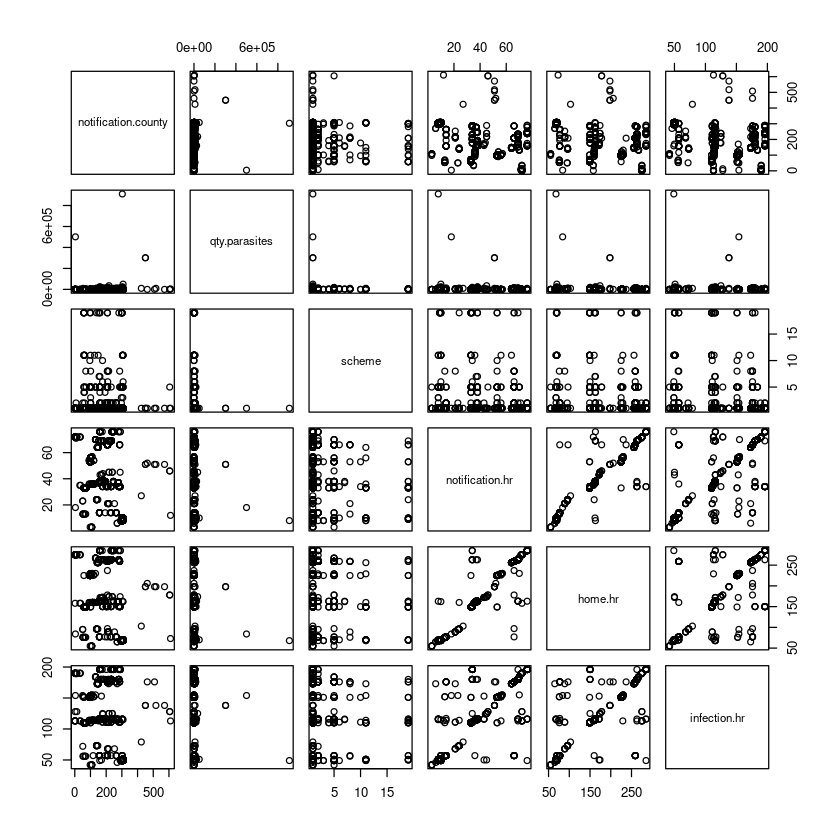

In [16]:
# Dando uma olhada na disperção dos dados para novos candidatos
pairs(data3)


Warning message:
“argument frame is deprecated; please use ellipse instead.”


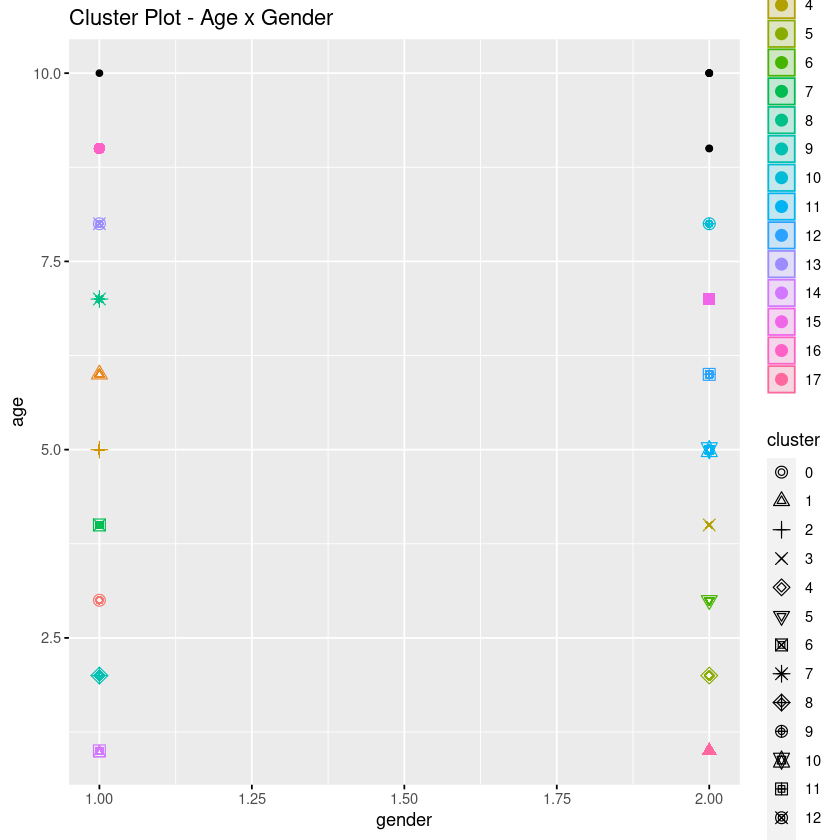

In [17]:
# Compute DBSCAN using fpc package
set.seed(123)
db <- fpc::dbscan(split[,1:2], eps = 0.15, MinPts = 5)
# Plot DBSCAN results
#plot(db, split[,1:2], main = "DBSCAN", frame = FALSE)
fviz_cluster(db, split[,1:2], stand = FALSE, frame = FALSE, geom = "point",
            main = "Cluster Plot - Age x Gender")

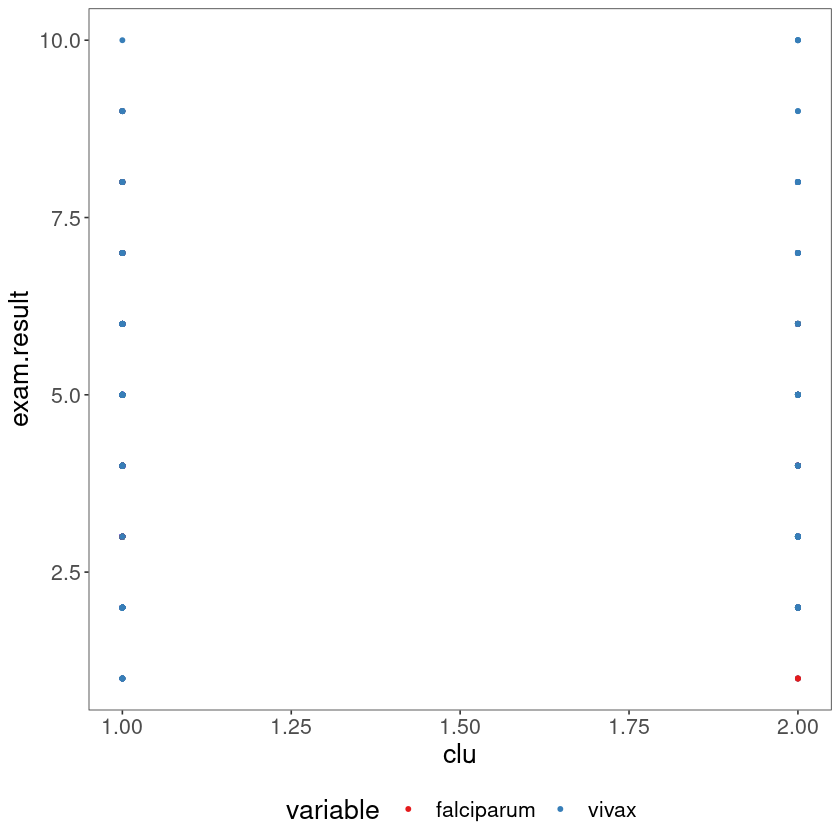

In [18]:
grf <- plot_scatter(split |> select(x = gender, value = age, variable = exam.result), 
                    label_x = "clu", label_y = "exam.result", colors=colors[1:3]) + font
plot(grf)

Warning message:
“argument frame is deprecated; please use ellipse instead.”


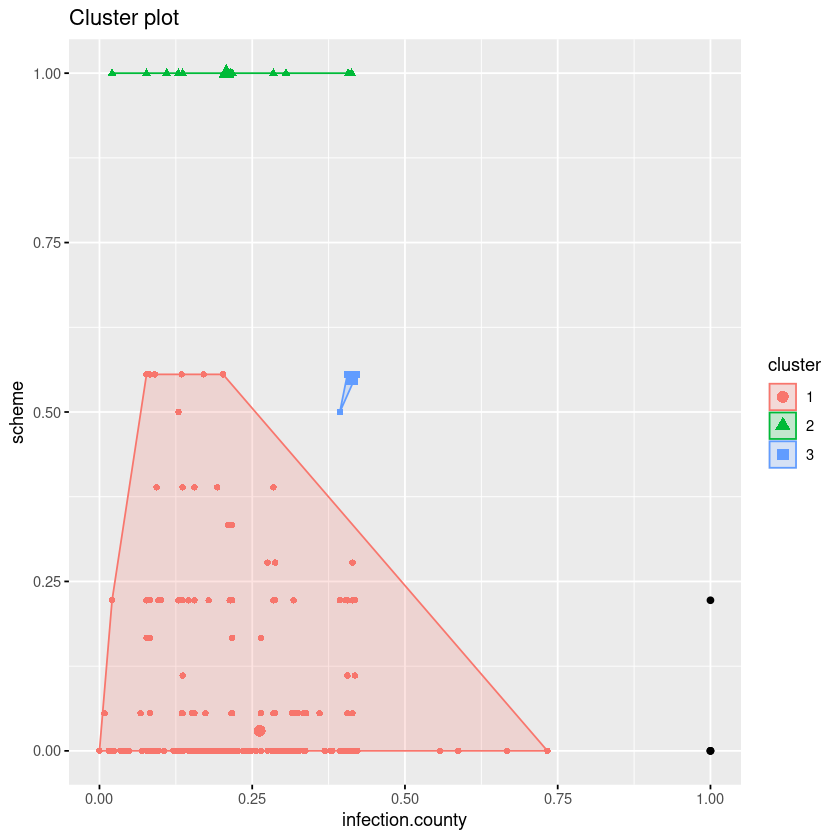

In [19]:
#Plotando Alguns Gráficos com o fviz_cluster

#plot_scatter(split, label_x = split$gender, label_y = split$age)
#plot(data2$notification.county,split$qty.parasites)
#head(split)
# Compute DBSCAN using fpc package
set.seed(123)
teste <- data2 %>% select (infection.county,scheme)
teste$infection.county <- unclass(teste$infection.county)
teste$scheme <- unclass(teste$scheme)
teste$infection.county <- rescale(teste$infection.county)
teste$scheme <- rescale(teste$scheme)
db2 <- fpc::dbscan(teste, eps = 0.15, MinPts = 5)
# Plot DBSCAN results
#plot(db2, teste[,1], main = "DBSCAN Infection Count", frame = FALSE)
fviz_cluster(db2, teste, stand = FALSE, frame = FALSE, geom = "point")

Warning message:
“argument frame is deprecated; please use ellipse instead.”


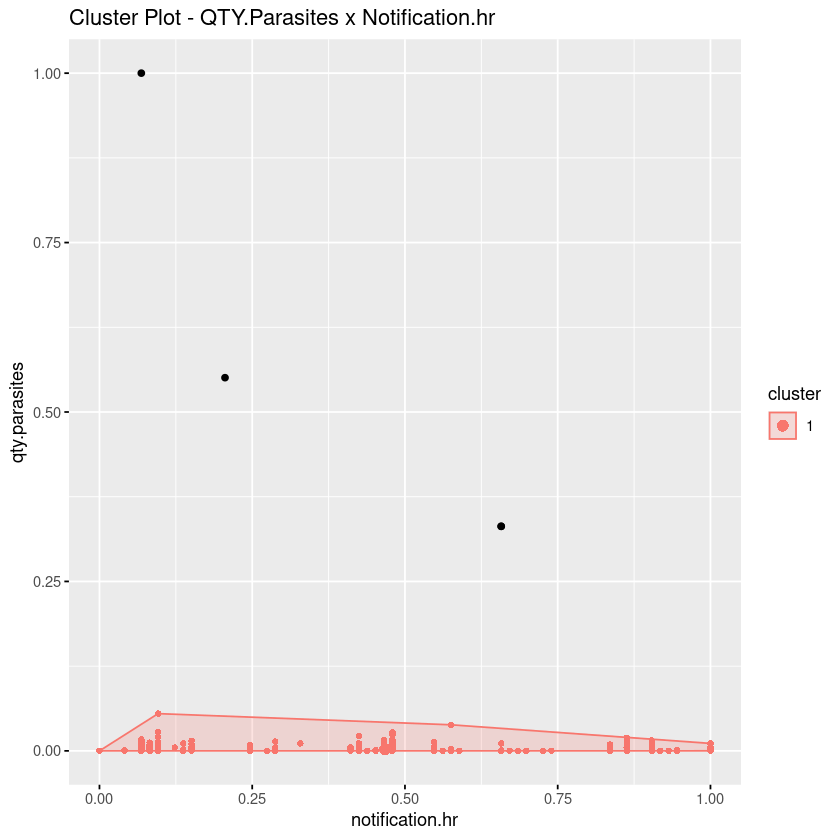

In [20]:
teste2 <- data2 %>% select (notification.hr,qty.parasites)
teste2$notification.hr <- unclass(teste2$notification.hr)
teste2$qty.parasites <- unclass(teste2$qty.parasites)
teste2$notification.hr <- rescale(teste2$notification.hr)
teste2$qty.parasites <- rescale(teste2$qty.parasites)

teste2$qty.parasites <- as.numeric(teste2$qty.parasites)
teste2$notification.hr <- as.numeric(teste2$notification.hr)

db4 <- fpc::dbscan(teste2, eps = 0.15, MinPts = 5)
fviz_cluster(db4, teste2, stand = FALSE, frame = FALSE, geom = "point", main = "Cluster Plot - QTY.Parasites x Notification.hr")

In [21]:
args(fviz_cluster)

function (object, data = NULL, choose.vars = NULL, stand = TRUE, 
    axes = c(1, 2), geom = c("point", "text"), repel = FALSE, 
    show.clust.cent = TRUE, ellipse = TRUE, ellipse.type = "convex", 
    ellipse.level = 0.95, ellipse.alpha = 0.2, shape = NULL, 
    pointsize = 1.5, labelsize = 12, main = "Cluster plot", xlab = NULL, 
    ylab = NULL, outlier.color = "black", outlier.shape = 19, 
    outlier.pointsize = pointsize, outlier.labelsize = labelsize, 
    ggtheme = theme_grey(), ...) 
NULL

In [22]:
# ------------------ #

In [23]:
k_means_test <- function(data, classe, paramsList) {
  model <- clu_tune(cluster_kmeans(k = 0))
  model <- fit(model, data, paramsList)
  clu <- cluster(model, data)
  eval <- evaluate(model, clu, classe)
  eval
}

my_dict <- list(
  best_algorithm = 'best',
  params = c("item1", "item2"),
  result = 10
)

#------------ geográfica ----------- #
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                           infection.state,infection.country,
                                           exam.result, hemiparasite)
s_i_r_p <- split_infection_region_parasite %>% 
  filter (exam.result!="negative" & hemiparasite!="negative")
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)
s_i_r_p <- na.omit(s_i_r_p) #na.omit

#------------ geográfica ----------- #
# -- Parasitas -- #
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                                    infection.state,infection.country,
                                                    exam.result, hemiparasite)
s_i_r_p <- na.omit(split_infection_region_parasite)
s_i_r_p <- s_i_r_p %>% filter (exam.result!="negative")
#s_i_r_p <- s_i_r_p %>% filter (hemiparasite!="negative")
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)

#Escolha de parametros
params <- list( k = c(180,190,200,210) )
as.integer(params[['k']] )

# Teste full
result <- k_means_test(s_i_r_p[,1:4], s_i_r_p$hemiparasite, params)

# Clustering por quantidade de parasitas
split_infection_region_parasite <- data %>% select (infection.county,infection.hr,
                                                    infection.state,infection.country,
                                                    qty.parasites)
s_i_r_p <- na.omit(split_infection_region_parasite)
# -- Smoothing na quantidade de parasitas
ob <- smoothing_cluster(n = 10)
ob <- fit(ob, s_i_r_p$qty.parasites)
qnt_parasites_bins <- transform(ob, s_i_r_p$qty.parasites)
s_i_r_p$qty.parasites <- qnt_parasites_bins
s_i_r_p$infection.county <- unclass(s_i_r_p$infection.county)
s_i_r_p$infection.hr <- unclass(s_i_r_p$infection.hr)
s_i_r_p$infection.state <- unclass(s_i_r_p$infection.state)
s_i_r_p$infection.country <- unclass(s_i_r_p$infection.country)
#Escolha de parametros
params <- list( k = c(180,190,200,210) )
as.integer(params[['k']] )
result <- k_means_test(s_i_r_p[,1:4], s_i_r_p$qty.parasites, params)

# Clustering demográfico
split_demografico <- data %>% select (age, gender, race, 
                                      #occupation, education.level,
                                pregnancy, autochthonous.case, 
                                #exam.result)
                                #hemiparasite)
                                #previous.treatment)
                                symptom)

split_demog <- na.omit(split_demografico)

#split_demog$occupation <- unclass(split_demog$occupation)
#split_demog$education.level <- unclass(split_demog$education.level)
# -------- Organizando as grávidas ------------- #
split_demog <- split_demog %>% filter (pregnancy != "ignored gestational ")
split_demog <- split_demog %>%
  mutate(pregnancy = ifelse(grepl("trimester", pregnancy) , as.integer(1), as.integer(0)))

split_demog$pregnancy <- unclass(split_demog$pregnancy)
split_demog$autochthonous.case <- unclass(split_demog$autochthonous.case)
split_demog$age <- unclass(split_demog$age)
split_demog$gender <- unclass(split_demog$gender)
split_demog$race <- unclass(split_demog$race)

#Tornando os resultados de exames positivos ou negativos
#split_demog <- split_demog %>%
#  mutate(exam.result = ifelse(exam.result != 'negative', 'positive', 'negative'))

#Separando os parasitas
#split_demog <- split_demog %>% filter (hemiparasite != "negative")

#Escolha de parametros
params <- list( k = c(10,50,100,200) )
as.integer(params[['k']] )
#result <- k_means_test(split_demog[,1:5], split_demog$exam.result, params)
#result <- k_means_test(split_demog[,1:5], split_demog$hemiparasite, params)
#result <- k_means_test(split_demog[,1:5], split_demog$previous.treatment, params)
result <- k_means_test(split_demog[,1:5], split_demog$symptom, params)

# Clustering temporal
split_temporal <- data %>% select (notification.month, notification.year,
                                   exam.month, exam.year, treatment.month,
                                   symptom.month, symptom.year,
                                   exam.interval, treatment.interval,
                                   notification.interval,
                                   #symptom)
                                   exam.result)
                                   #hemiparasite)
split_tempo <- na.omit(split_temporal)

split_tempo$notification.month <- unclass(split_tempo$notification.month)
split_tempo$notification.year <- unclass(split_tempo$notification.year)
split_tempo$exam.month <- unclass(split_tempo$exam.month)
split_tempo$exam.year <- unclass(split_tempo$exam.year)
split_tempo$treatment.month <- unclass(split_tempo$treatment.month)
split_tempo$symptom.month <- unclass(split_tempo$symptom.month)
split_tempo$symptom.year <- unclass(split_tempo$symptom.year)
split_tempo$exam.interval <- unclass(split_tempo$exam.interval)
split_tempo$treatment.interval <- unclass(split_tempo$treatment.interval)
split_tempo$notification.interval <- unclass(split_tempo$notification.interval)

#split_tempo$symptom <- unclass(split_tempo$symptom)
#split_tempo <- split_tempo %>%
#  mutate(exam.result = ifelse(exam.result != 'negative', 'positive', 'negative'))
split_tempo$exam.result <- unclass(split_tempo$exam.result)

#split_tempo$hemiparasite <- unclass(split_tempo$hemiparasite)

params <- list( k = c(12,100,500, 1000) )
as.integer(params[['k']] )
#result <- k_means_test(split_tempo[,1:11], split_tempo$symptom, params)
#result <- k_means_test(split_tempo[,1:11], split_tempo$exam.result, params)
#result <- k_means_test(split_tempo[,1:11], split_tempo$hemiparasite, params)

# Clustering da doença
split_sick <- data %>% select (symptom, qty.parasites, exam.type,
                                   hemiparasite, detection.type,
                                   #symptom),
                                   exam.result)
split_sick <- na.omit(split_sick)
ob <- smoothing_cluster(n = 10)
ob <- fit(ob, split_sick$qty.parasites)
split_sick$qty.parasites <- transform(ob, split_sick$qty.parasites)
split_sick$qty.parasites <- as.integer(round(split_sick$qty.parasites))
split_sick$qty.parasites <- unclass(split_sick$qty.parasites)
split_sick$symptom <- unclass(split_sick$symptom)
split_sick$exam.type <- unclass(split_sick$exam.type)
split_sick$hemiparasite <- unclass(split_sick$hemiparasite)
split_sick$detection.type <- unclass(split_sick$detection.type)
split_sick$exam.result <- unclass(split_sick$exam.result)
split_sick <- na.omit(split_sick)
params <- list( k = c(200,400,800,1600) )
as.integer(params[['k']] )
result <- k_means_test(split_sick[,1:5], split_sick$exam.result, params)

# --- caso precise usar samples --- #
sample <- sample_stratified("exam.result")
folds <- k_fold(sample, split_infection_region, 2)
my_sample <- folds[[1]]
result <- k_means_test(my_sample[,1:4], my_sample[,5], params)

[1] 180 190 200 210

[1] 180 190 200 210

[1]  10  50 100 200

[1]   12  100  500 1000

[1]  200  400  800 1600

ERROR: Error in stats::smooth.spline(x, y, df = obj$df): missing or infinite values in inputs are not allowed
